In [1]:
# Data Collection and Preprocessing
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Import libraries and metrics
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import accuracy_score, roc_curve, classification_report
from sklearn.metrics import confusion_matrix, make_scorer, roc_auc_score
from sklearn.metrics import RocCurveDisplay, ConfusionMatrixDisplay
pd.options.mode.chained_assignment = None

# JD Sports Fashion plc Historical Data
# Download data from Yahoo Finance
jdData = yf.download('JD.L', start="2014-01-01", end='2023-12-31')

# Feature Engineering
# Data Reduction
jdData = jdData.dropna()
jdData = jdData[['Volume', 'Open', 'High', 'Low', 'Close']]

# Future Creation
jdData['H-L'] = jdData['High'] - jdData['Low']
jdData['O-C'] = jdData['Close'] - jdData['Open']
jdData['3day MA'] = jdData['Close'].shift(1).rolling(window=3).mean()
jdData['10day MA'] = jdData['Close'].shift(1).rolling(window=10).mean()
jdData['30day MA'] = jdData['Close'].shift(1).rolling(window=30).mean()
jdData['Std_dev'] = jdData['Close'].rolling(5).std()
jdData['Price_Rise'] = np.where(jdData['Close'].shift(-1) > jdData['Close'], 1, 0)
jdData = jdData.dropna()

[*********************100%%**********************]  1 of 1 completed


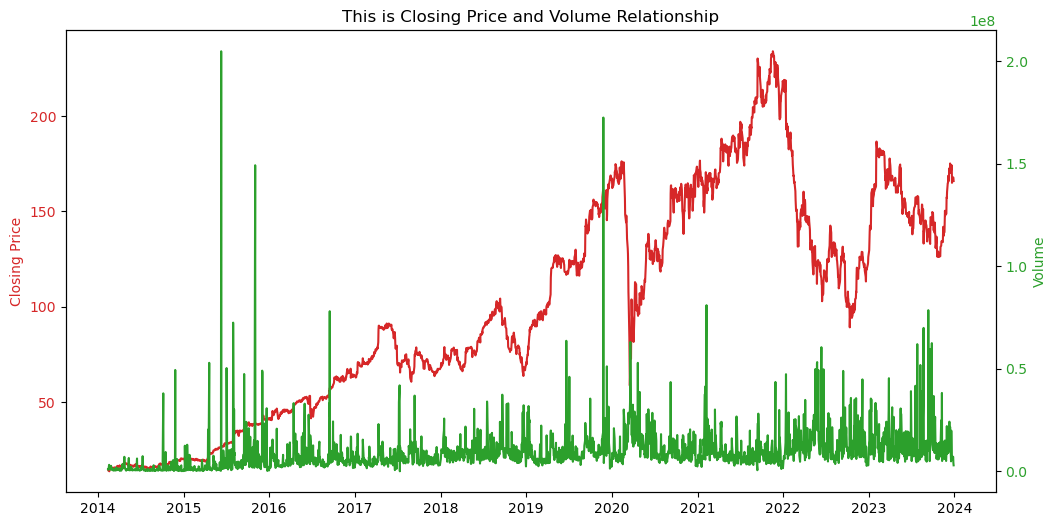

In [2]:
# EDA of Created Features
# Plots Close Price and Volume
fig, ax1 = plt.subplots(figsize=(12, 6))
color = 'tab:red'
ax1.set_ylabel('Closing Price', color=color)
ax1.plot(jdData['Close'], label='Close', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:green'
ax2.set_ylabel('Volume', color=color)
ax2.plot(jdData['Volume'], label='Volume', color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('This is Closing Price and Volume Relationship')
plt.show()

# And so on for other figures and analyses, adapting each part to work with JD.L data.



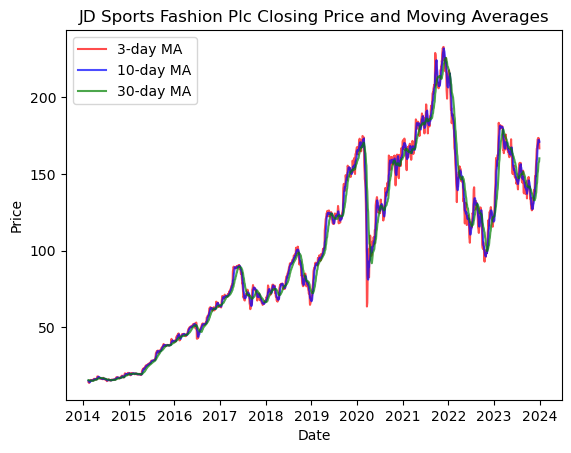

In [3]:
# Plotting Moving Averages
plt.plot(jdData.index, jdData['3day MA'], label='3-day MA', color='red', alpha=0.7)
plt.plot(jdData.index, jdData['10day MA'], label='10-day MA', color='blue', alpha=0.7)
plt.plot(jdData.index, jdData['30day MA'], label='30-day MA', color='green', alpha=0.7)

plt.title('JD Sports Fashion Plc Closing Price and Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

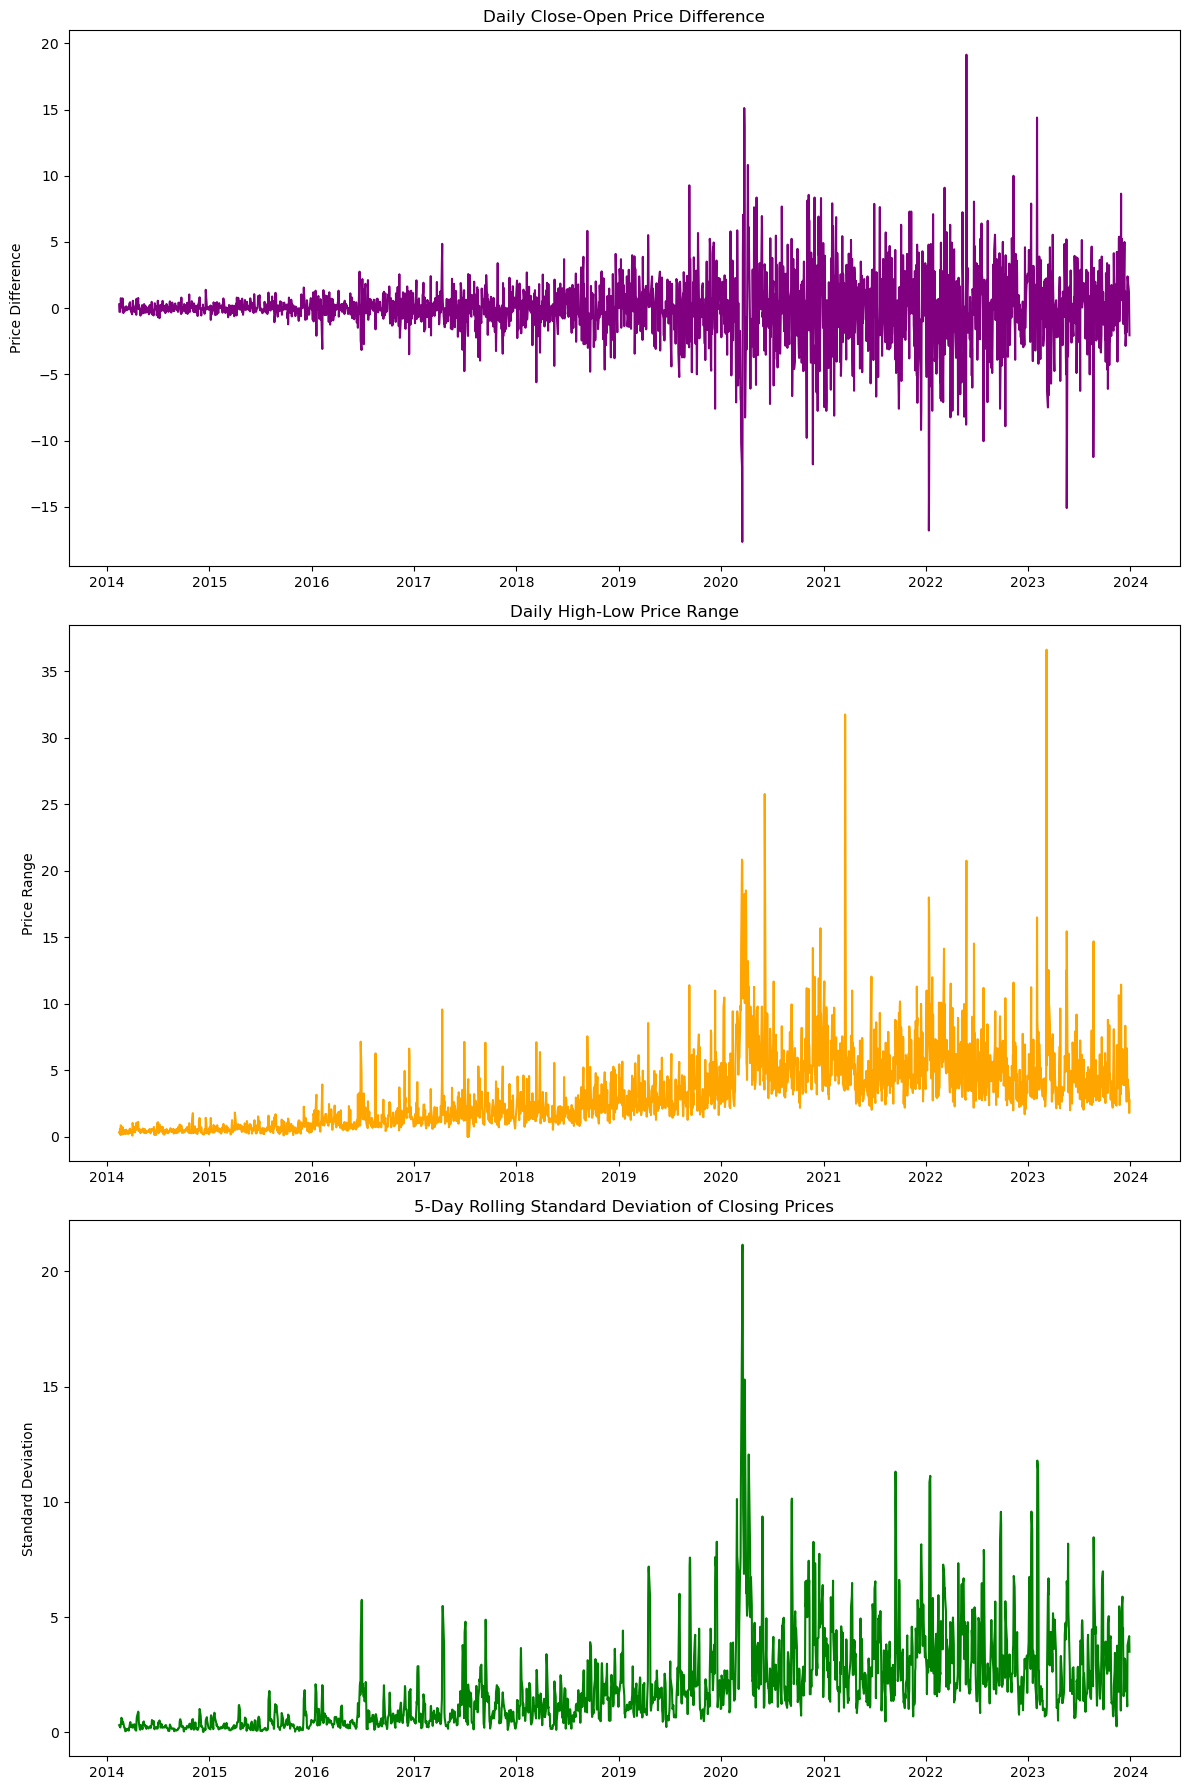

In [4]:
# Plotting O-C, H-L, and Std_dev
fig, axs = plt.subplots(3, 1, figsize=(12, 18))
axs[0].plot(jdData.index, jdData['O-C'], label='Close-Open (O-C)', color='purple')
axs[0].set_title('Daily Close-Open Price Difference')
axs[0].set_ylabel('Price Difference')
axs[1].plot(jdData.index, jdData['H-L'], label='High-Low (H-L)', color='orange')
axs[1].set_title('Daily High-Low Price Range')
axs[1].set_ylabel('Price Range')
axs[2].plot(jdData.index, jdData['Std_dev'], label='5-Day Std Dev', color='green')
axs[2].set_title('5-Day Rolling Standard Deviation of Closing Prices')
axs[2].set_ylabel('Standard Deviation')

plt.tight_layout()

Text(0, 0.5, 'Frequency')

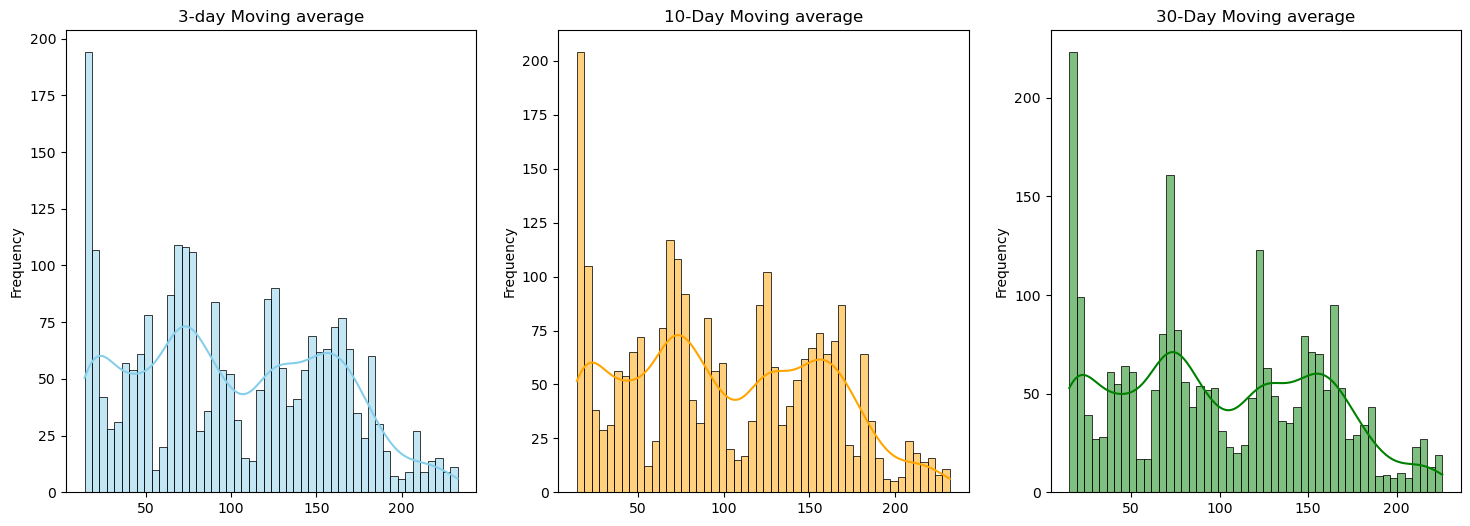

In [5]:
# Histogram and Density Plots for MAs

# Set up the matplotlib figure with 3 subplots in a row
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Plot histogram for the 3-day moving average
sns.histplot(jdData['3day MA'].dropna(), bins=50, color='skyblue', ax=axes[0], kde=True)
axes[0].set_title('3-day Moving average')
axes[0].set_xlabel('')
axes[0].set_ylabel('Frequency')

# Plot histogram for the 10-day moving average 
sns.histplot(jdData['10day MA'].dropna(), bins=50, color='orange', ax=axes[1], kde=True)
axes[1].set_title('10-Day Moving average')
axes[1].set_xlabel('')
axes[1].set_ylabel('Frequency')

# Plot histogram for the 30-day moving average
sns.histplot(jdData['30day MA'].dropna(), bins=50, color='green', ax=axes[2], kde=True)
axes[2].set_title('30-Day Moving average')
axes[2].set_xlabel('')
axes[2].set_ylabel('Frequency')


/Users/jankouril/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/Users/jankouril/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


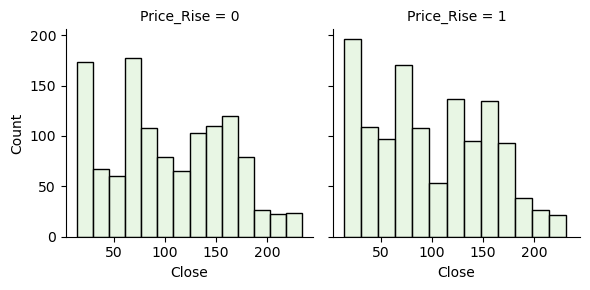

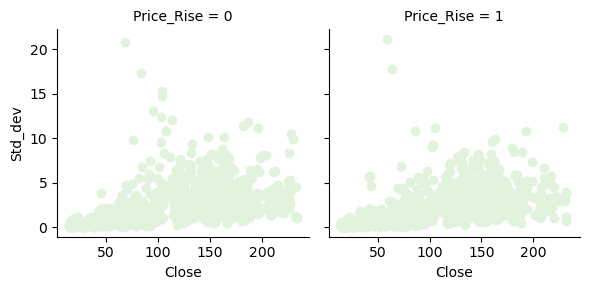

In [6]:
sns.set_palette("Greens")
chart_hist = sns.FacetGrid(jdData, col='Price_Rise')  
chart_hist.map(sns.histplot, 'Close') 

# Create FacetGrid for scatter plot
chart_scatter = sns.FacetGrid(jdData, col='Price_Rise')  
chart_scatter.map(plt.scatter, 'Close', 'Std_dev')

plt.show()

In [7]:
jdData.info()
jdData.describe ()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2495 entries, 2014-02-13 to 2023-12-29
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Volume      2495 non-null   int64  
 1   Open        2495 non-null   float64
 2   High        2495 non-null   float64
 3   Low         2495 non-null   float64
 4   Close       2495 non-null   float64
 5   H-L         2495 non-null   float64
 6   O-C         2495 non-null   float64
 7   3day MA     2495 non-null   float64
 8   10day MA    2495 non-null   float64
 9   30day MA    2495 non-null   float64
 10  Std_dev     2495 non-null   float64
 11  Price_Rise  2495 non-null   int64  
dtypes: float64(10), int64(2)
memory usage: 253.4 KB


,Volume,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise
count,2.495000e+03,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000,2495.000000
mean,9.512275e+06,100.556134,102.146708,98.890192,100.510027,3.256515,-0.046108,100.387802,100.169976,99.570903,2.009225,0.513026
std,1.062680e+07,56.947389,57.831597,56.012787,56.867508,2.893853,2.486305,56.857720,56.793824,56.632931,2.072783,0.499930
min,0.000000e+00,13.610000,13.750000,13.440000,13.700000,0.000000,-17.660004,13.853333,14.324000,15.097333,0.017297,0.000000
25%,4.093725e+06,52.100000,52.500000,51.599998,52.160000,1.097599,-0.859997,52.093333,51.732001,50.732667,0.507346,0.000000
50%,7.043249e+06,94.000000,95.320000,92.500000,93.400002,2.569000,0.000000,93.313334,93.178000,93.368167,1.426996,1.000000
75%,1.184014e+07,148.934998,151.159996,146.199997,148.955002,4.559998,0.820000,148.866666,149.190998,148.444334,2.769010,1.000000
max,2.049003e+08,234.699997,235.699997,231.300003,234.000000,36.617996,19.150002,232.899999,231.930000,225.731667,21.156807,1.000000


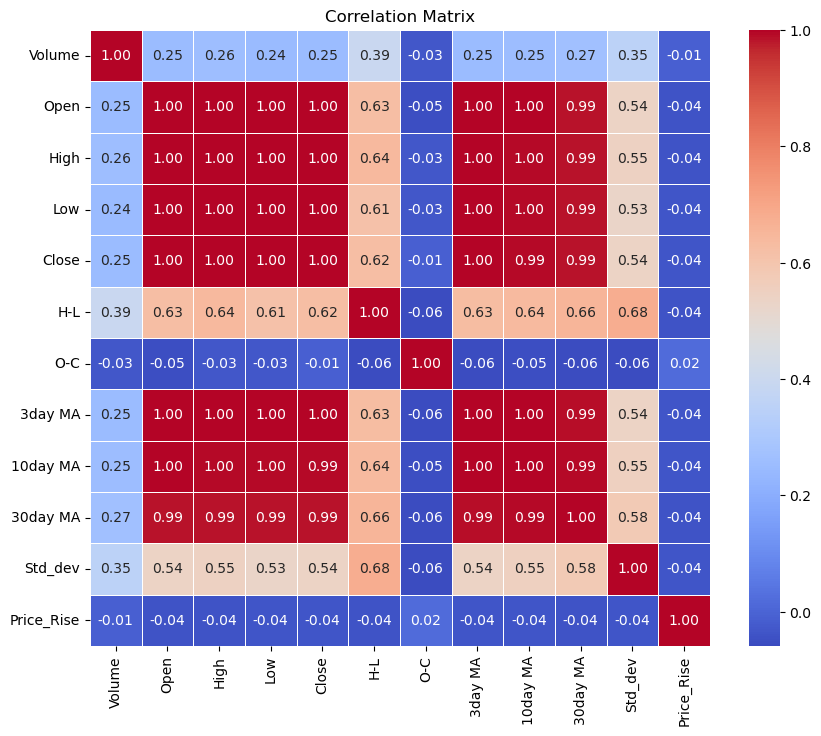

In [8]:
corr_matrix = jdData.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

In [9]:
# Machine Learning Classification Methods
# Data Preprocessing
X = jdData.iloc[:, 5:-1]
Y = jdData.iloc[:, -1]

In [10]:
X

,H-L,O-C,3day MA,10day MA,30day MA,Std_dev
Date,,,,,,
2014-02-13,0.320000,0.290000,14.396667,15.302000,15.675333,0.310113
2014-02-14,0.306601,-0.280001,14.246667,15.126000,15.668000,0.285605
2014-02-17,0.620001,-0.270000,14.213333,14.919000,15.639000,0.210238
2014-02-18,0.140000,0.090000,14.070000,14.702000,15.592000,0.276821
2014-02-19,0.876000,0.750000,13.853333,14.489000,15.540333,0.345644
...,...,...,...,...,...,...
2023-12-21,3.300003,1.699997,172.766668,171.484999,155.856667,1.127276
2023-12-22,4.350006,2.399994,173.583333,172.299998,157.170000,3.777565
2023-12-27,3.349991,1.250000,171.083333,172.104999,158.205000,4.095364


In [11]:
# Split the data into training and testing sets

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, 
                                   shuffle=False)
X_test

,H-L,O-C,3day MA,10day MA,30day MA,Std_dev
Date,,,,,,
2022-01-06,5.000000,-1.000000,217.533335,212.239999,217.138333,2.519522
2022-01-07,6.000000,2.600006,215.866669,213.600000,216.521666,2.571381
2022-01-10,7.599991,-2.599991,215.266668,214.280000,215.938333,2.609980
2022-01-11,7.199997,4.800003,213.200002,214.800000,215.458333,3.161012
2022-01-12,18.000000,-16.800003,215.200002,215.600000,215.181667,2.835843
...,...,...,...,...,...,...
2023-12-21,3.300003,1.699997,172.766668,171.484999,155.856667,1.127276
2023-12-22,4.350006,2.399994,173.583333,172.299998,157.170000,3.777565
2023-12-27,3.349991,1.250000,171.083333,172.104999,158.205000,4.095364


In [12]:
# Standardize the features (optional but can be beneficial for logistic regression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [13]:
# Logistic regression Model
modellr = LogisticRegression(random_state=101)
# Train the model
modellr.fit(X_train, Y_train)
# Predict on the test set
Y_pred = modellr.predict(X_test)

print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.48      0.41      0.44       258
           1       0.46      0.53      0.49       241

    accuracy                           0.47       499
   macro avg       0.47      0.47      0.47       499
weighted avg       0.47      0.47      0.47       499



In [14]:
# Extra trees Model
modelet = ExtraTreesClassifier(random_state=101)
# Train the model
modelet.fit(X_train, Y_train)
# Predict on the test set
Y_pred = modelet.predict(X_test)

print (classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.46      0.32      0.38       258
           1       0.45      0.60      0.52       241

    accuracy                           0.45       499
   macro avg       0.46      0.46      0.45       499
weighted avg       0.46      0.45      0.44       499



In [15]:
#Cross Validation

#Cross Validation for Logistic Regression

accuracy_scores = cross_val_score(modellr, X, Y, cv=5, 
                scoring=make_scorer(accuracy_score))

# Print mean and standard deviation of accuracy
print(f"Mean Accuracy: {accuracy_scores.mean():.2f}")
print(f"Standard Deviation: {accuracy_scores.std():.2f}")

Mean Accuracy: 0.50
Standard Deviation: 0.01


In [16]:
#Cross Validation for Extra Tree

accuracy_scores = cross_val_score(modelet, X, Y, cv=5, 
                scoring=make_scorer(accuracy_score))

# Mean and standard deviation of accuracy
print(f"Mean Accuracy: {accuracy_scores.mean():.2f}")
print(f"Standard Deviation Accuracy: {accuracy_scores.std():.2f}")

Mean Accuracy: 0.44
Standard Deviation Accuracy: 0.04


In [17]:
modelet = ExtraTreesClassifier(random_state=101)
modelet.fit(X_train, Y_train)
Y_pred = modelet.predict(X_test)

classification_rep = classification_report(Y_test, Y_pred)
print("Classification Report:\n", classification_rep)

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.32      0.38       258
           1       0.45      0.60      0.52       241

    accuracy                           0.45       499
   macro avg       0.46      0.46      0.45       499
weighted avg       0.46      0.45      0.44       499



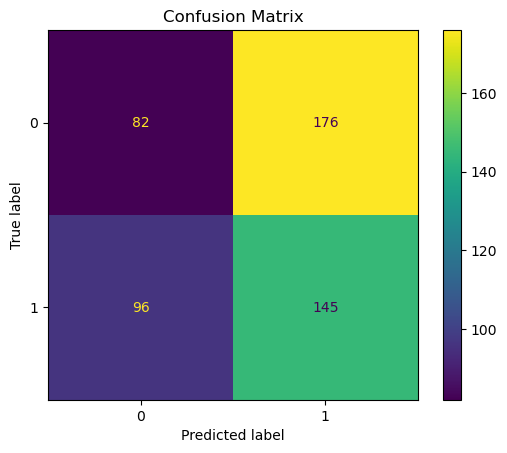

In [18]:
# Confusion Matrix
conf_matrix = confusion_matrix(Y_test, Y_pred)

# Evaluate the modelet by means of a Confusion Matrix
matrix = ConfusionMatrixDisplay.from_estimator(modelet, X_test, Y_test)  
plt.title('Confusion Matrix')
plt.show(matrix)
plt.show()

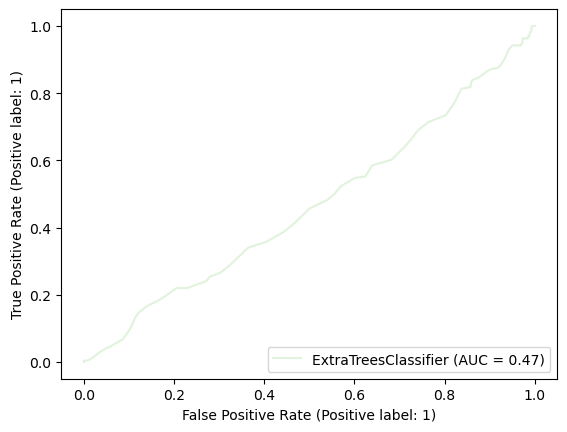

In [19]:

# ROC Curve
log_disp = RocCurveDisplay.from_estimator(modelet, X_test, Y_test)

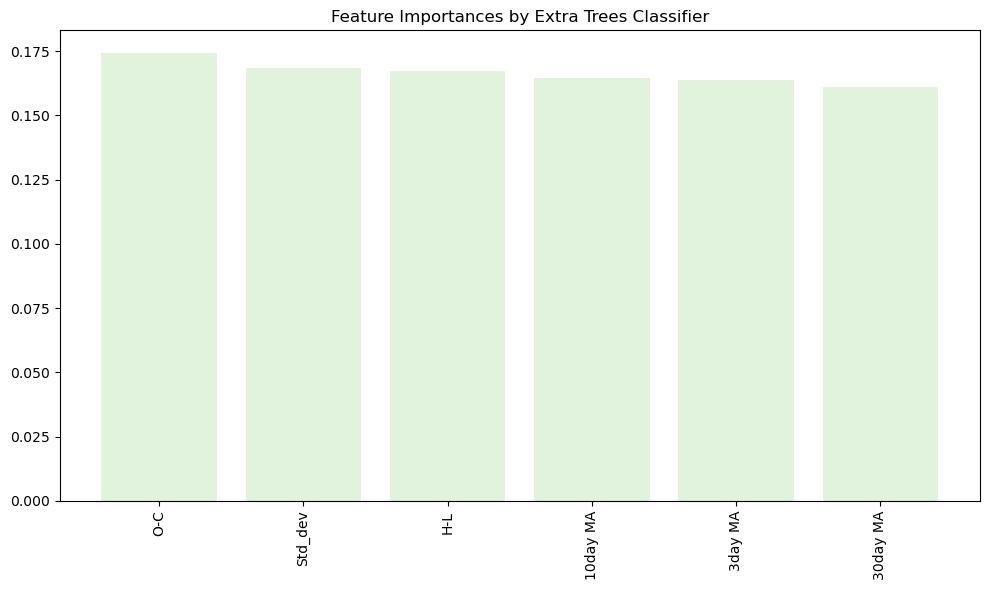

In [20]:
# Feature Importance for Extra Trees Classifier
feature_importance_et = modelet.feature_importances_
sorted_indices_et = np.argsort(feature_importance_et)[::-1]

plt.figure(figsize=(10, 6))
plt.title("Feature Importances by Extra Trees Classifier")
plt.bar(range(X.shape[1]), feature_importance_et[sorted_indices_et], align="center")
plt.xticks(range(X.shape[1]), X.columns[sorted_indices_et], rotation=90)
plt.tight_layout()
plt.show()

In [21]:
#Market and Return Strategies

#Data Preprocessing

#Create new column Y_pred
jdData['Y_pred'] = np.NaN
jdData.iloc[(len(jdData) - len(Y_pred)):,-1] = Y_pred
trade_jdData = jdData.dropna()
trade_jdData

,Volume,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise,Y_pred
Date,,,,,,,,,,,,,
2022-01-06,6384046,213.800003,215.600006,210.600006,212.800003,5.000000,-1.000000,217.533335,212.239999,217.138333,2.519522,1,1.0
2022-01-07,6014411,211.399994,217.399994,211.399994,214.000000,6.000000,2.600006,215.866669,213.600000,216.521666,2.571381,0,1.0
2022-01-10,12181185,215.399994,217.199997,209.600006,212.800003,7.599991,-2.599991,215.266668,214.280000,215.938333,2.609980,1,1.0
2022-01-11,13923950,214.000000,219.800003,212.600006,218.800003,7.199997,4.800003,213.200002,214.800000,215.458333,3.161012,0,0.0
2022-01-12,26786914,228.300003,229.399994,211.399994,211.500000,18.000000,-16.800003,215.200002,215.600000,215.181667,2.835843,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,7344775,172.250000,175.350006,172.050003,173.949997,3.300003,1.699997,172.766668,171.484999,155.856667,1.127276,0,1.0
2023-12-22,5621435,162.600006,166.350006,162.000000,165.000000,4.350006,2.399994,173.583333,172.299998,157.170000,3.777565,1,1.0
2023-12-27,7112227,166.649994,168.399994,165.050003,167.899994,3.349991,1.250000,171.083333,172.104999,158.205000,4.095364,0,0.0


In [22]:
#Computation of market returns

trade_jdData['Tomorrows Returns'] = 0.
trade_jdData['Tomorrows Returns'] = np.log(trade_jdData['Close']/trade_jdData['Close'].shift(1))
trade_jdData['Tomorrows Returns'] = trade_jdData['Tomorrows Returns'].shift(-1)
trade_jdData

,Volume,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise,Y_pred,Tomorrows Returns
Date,,,,,,,,,,,,,,
2022-01-06,6384046,213.800003,215.600006,210.600006,212.800003,5.000000,-1.000000,217.533335,212.239999,217.138333,2.519522,1,1.0,0.005623
2022-01-07,6014411,211.399994,217.399994,211.399994,214.000000,6.000000,2.600006,215.866669,213.600000,216.521666,2.571381,0,1.0,-0.005623
2022-01-10,12181185,215.399994,217.199997,209.600006,212.800003,7.599991,-2.599991,215.266668,214.280000,215.938333,2.609980,1,1.0,0.027805
2022-01-11,13923950,214.000000,219.800003,212.600006,218.800003,7.199997,4.800003,213.200002,214.800000,215.458333,3.161012,0,0.0,-0.033933
2022-01-12,26786914,228.300003,229.399994,211.399994,211.500000,18.000000,-16.800003,215.200002,215.600000,215.181667,2.835843,0,0.0,-0.066211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,7344775,172.250000,175.350006,172.050003,173.949997,3.300003,1.699997,172.766668,171.484999,155.856667,1.127276,0,1.0,-0.052822
2023-12-22,5621435,162.600006,166.350006,162.000000,165.000000,4.350006,2.399994,173.583333,172.299998,157.170000,3.777565,1,1.0,0.017423
2023-12-27,7112227,166.649994,168.399994,165.050003,167.899994,3.349991,1.250000,171.083333,172.104999,158.205000,4.095364,0,0.0,-0.002684


In [23]:
#Computation of strategy returns

#Strategy Returns based on Y_Pred
trade_jdData['Strategy Returns'] = 0.
trade_jdData['Strategy Returns'] = np.where(trade_jdData['Y_pred'] == True,
                                 trade_jdData['Tomorrows Returns'], - trade_jdData['Tomorrows Returns'])
trade_jdData

,Volume,Open,High,Low,Close,H-L,O-C,3day MA,10day MA,30day MA,Std_dev,Price_Rise,Y_pred,Tomorrows Returns,Strategy Returns
Date,,,,,,,,,,,,,,,
2022-01-06,6384046,213.800003,215.600006,210.600006,212.800003,5.000000,-1.000000,217.533335,212.239999,217.138333,2.519522,1,1.0,0.005623,0.005623
2022-01-07,6014411,211.399994,217.399994,211.399994,214.000000,6.000000,2.600006,215.866669,213.600000,216.521666,2.571381,0,1.0,-0.005623,-0.005623
2022-01-10,12181185,215.399994,217.199997,209.600006,212.800003,7.599991,-2.599991,215.266668,214.280000,215.938333,2.609980,1,1.0,0.027805,0.027805
2022-01-11,13923950,214.000000,219.800003,212.600006,218.800003,7.199997,4.800003,213.200002,214.800000,215.458333,3.161012,0,0.0,-0.033933,0.033933
2022-01-12,26786914,228.300003,229.399994,211.399994,211.500000,18.000000,-16.800003,215.200002,215.600000,215.181667,2.835843,0,0.0,-0.066211,0.066211
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-21,7344775,172.250000,175.350006,172.050003,173.949997,3.300003,1.699997,172.766668,171.484999,155.856667,1.127276,0,1.0,-0.052822,-0.052822
2023-12-22,5621435,162.600006,166.350006,162.000000,165.000000,4.350006,2.399994,173.583333,172.299998,157.170000,3.777565,1,1.0,0.017423,0.017423
2023-12-27,7112227,166.649994,168.399994,165.050003,167.899994,3.349991,1.250000,171.083333,172.104999,158.205000,4.095364,0,0.0,-0.002684,0.002684


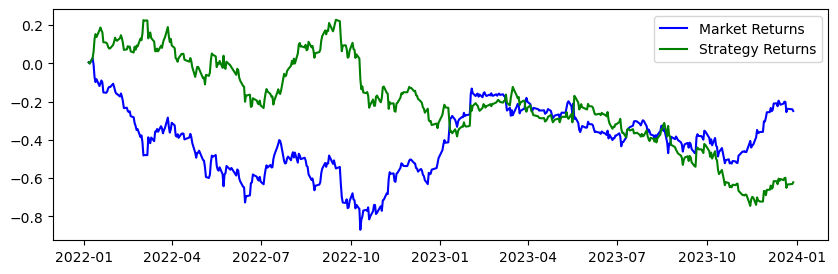

In [25]:
#Cummulative Market and Strategies Returns

#Computation of cummulative market and strategy returns

trade_jdData['Cumulative Market Returns'] = np.cumsum(trade_jdData['Tomorrows Returns'])
trade_jdData['Cumulative Strategy Returns'] = np.cumsum(trade_jdData['Strategy Returns'])

#Plot of cummulative market and strategy returns based on Y_prediction

plt.figure(figsize=(10,3))
plt.plot(trade_jdData['Cumulative Market Returns'], color='b', label='Market Returns')
plt.plot(trade_jdData['Cumulative Strategy Returns'], color='g', label='Strategy Returns')
plt.legend()
plt.show()